# Project Name: Premium prediction for Health insurance

# Step-1: Data Loading + EDA + Data Cleaning

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("premiums.xlsx")
df

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


# EDA + Data cleaning

In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number of dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(" ", "_")

In [8]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

# Handling of Null values

In [9]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

# Handling Duplicate values

In [12]:
print(df.duplicated().sum())

0


In [13]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


## Resolve Negative value in number of dependent column

In [14]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [15]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1])

In [16]:
# By mistage customer write +3 to -3 and +1 to -1
df.number_of_dependants = df.number_of_dependants.abs()

In [17]:
df.number_of_dependants.unique()

array([0, 2, 3, 4, 1, 5])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49976 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49976 non-null  int64 
 1   gender                 49976 non-null  object
 2   region                 49976 non-null  object
 3   marital_status         49976 non-null  object
 4   number_of_dependants   49976 non-null  int64 
 5   bmi_category           49976 non-null  object
 6   smoking_status         49976 non-null  object
 7   employment_status      49976 non-null  object
 8   income_level           49976 non-null  object
 9   income_lakhs           49976 non-null  int64 
 10  medical_history        49976 non-null  object
 11  insurance_plan         49976 non-null  object
 12  annual_premium_amount  49976 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


# Handling of Outliers

In [19]:
numeric_columns = df.select_dtypes(include = "int64").columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

## Box plot for Outliers

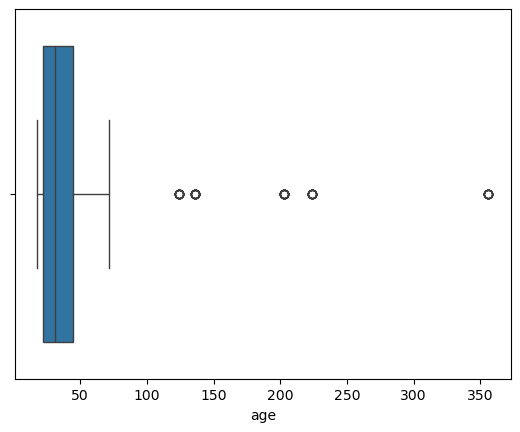

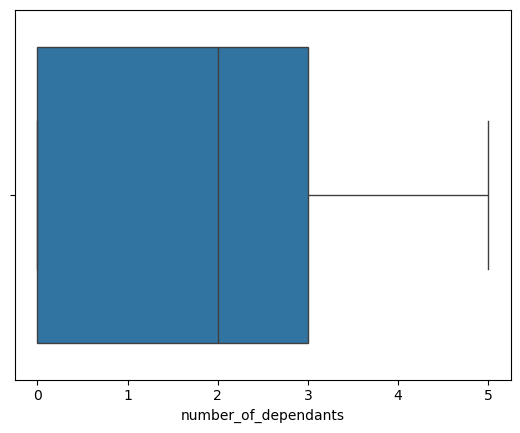

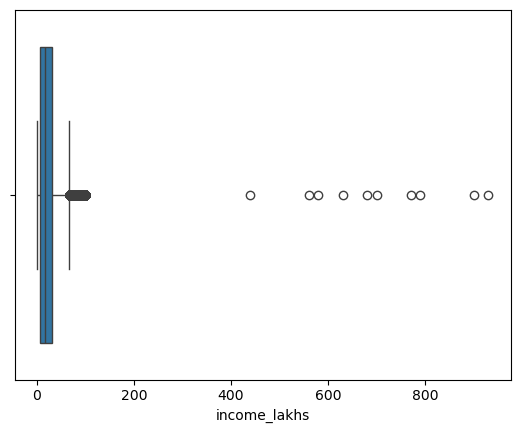

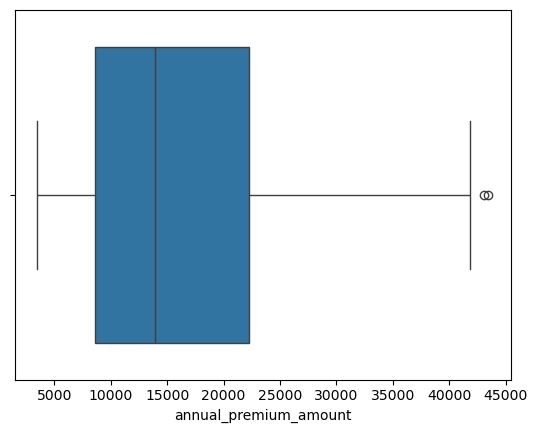

In [20]:
for col in numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()

### Handling of outlier in age column

In [21]:
Q1 = np.percentile(df.age, 25)
Q3 = np.percentile(df.age, 75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
print(UB)

22.0
45.0
79.5


In [22]:
df[df.age > 100].count()

age                      58
gender                   58
region                   58
marital_status           58
number_of_dependants     58
bmi_category             58
smoking_status           58
employment_status        58
income_level             58
income_lakhs             58
medical_history          58
insurance_plan           58
annual_premium_amount    58
dtype: int64

In [23]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [24]:
df[df.age > 100]['age'].value_counts()

age
136    15
203    13
124    11
224    10
356     9
Name: count, dtype: int64

In [25]:
median_age = df.age.median()
print(median_age)

31.0


In [26]:
df.loc[df.age > 100, 'age'] = median_age

In [27]:
df[df.age > 100].count()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handling outliers in income_lakhs column

In [28]:
Q1 = np.percentile(df.income_lakhs, 25)
Q3 = np.percentile(df.income_lakhs, 75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
print(UB)

7.0
31.0
67.0


In [29]:
df[df.income_lakhs > 100].count()

age                      10
gender                   10
region                   10
marital_status           10
number_of_dependants     10
bmi_category             10
smoking_status           10
employment_status        10
income_level             10
income_lakhs             10
medical_history          10
insurance_plan           10
annual_premium_amount    10
dtype: int64

In [30]:
df.shape

(49976, 13)

In [31]:
df[df.income_lakhs > 100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [32]:
# deleted the Outliers
df = df[df.income_lakhs <= 100]

In [33]:
df[df.income_lakhs > 100].count()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [34]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49966.000000,49966.000000,49966.000000,49966.000000
mean,34.397630,1.717308,22.886063,15765.961574
std,13.674151,1.491911,22.166488,8419.532784
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.250000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,100.000000,43471.000000


## EDA & Data Cleaning on Categorical variables

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49966 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49966 non-null  int64 
 1   gender                 49966 non-null  object
 2   region                 49966 non-null  object
 3   marital_status         49966 non-null  object
 4   number_of_dependants   49966 non-null  int64 
 5   bmi_category           49966 non-null  object
 6   smoking_status         49966 non-null  object
 7   employment_status      49966 non-null  object
 8   income_level           49966 non-null  object
 9   income_lakhs           49966 non-null  int64 
 10  medical_history        49966 non-null  object
 11  insurance_plan         49966 non-null  object
 12  annual_premium_amount  49966 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


In [36]:
categorical_columns = df.select_dtypes(include = "object").columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [37]:
for col in categorical_columns:
    print(col, ":", df[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [38]:
df.smoking_status = df.smoking_status.replace({'Smoking=0' : 'No Smoking', 'Does Not Smoke' : 'No Smoking', 'Not Smoking' : 'No Smoking'})

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_20112\1074089374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.smoking_status = df.smoking_status.replace({'Smoking=0' : 'No Smoking', 'Does Not Smoke' : 'No Smoking', 'Not Smoking' : 'No Smoking'})


In [39]:
df.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

# Step-2 : Feature Engineering

### convert the Categorical variable into Numerical variables

In [40]:
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

### Ordinal Encoding: Rank or Order 'income_level', 'insurance_plan'

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
encoder = OrdinalEncoder(categories = [['Bronze', 'Silver', 'Gold']])
df.insurance_plan = encoder.fit_transform(df[['insurance_plan']])

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_20112\1274939803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.insurance_plan = encoder.fit_transform(df[['insurance_plan']])


In [43]:
df.insurance_plan = df.insurance_plan.astype('int64')

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_20112\355962698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.insurance_plan = df.insurance_plan.astype('int64')


In [44]:
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,0,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,0,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,1,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,2,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,1,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,0,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,2,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,0,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,0,9490


In [45]:
encoder = OrdinalEncoder(categories = [['<10L', '10L - 25L', '25L - 40L', '> 40L']])
df.income_level = encoder.fit_transform(df[['income_level']])

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_20112\2938848440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_level = encoder.fit_transform(df[['income_level']])


In [46]:
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,0.0,6,Diabetes,0,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,0.0,6,Diabetes,0,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,1.0,20,High blood pressure,1,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3.0,77,No Disease,2,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3.0,99,High blood pressure,1,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,2.0,35,No Disease,0,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,3.0,82,Thyroid,2,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,2.0,32,No Disease,0,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,1.0,20,No Disease,0,9490


# Use Label encoding to convert categorical column to numerical number

In [47]:
for col in categorical_columns:
    print(col, ":", df[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : [0. 1. 3. 2.]
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : [0 1 2]


In [48]:
# Use label encoding when their is NO RANKING between the classes in the data

from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()
df.region = encoder.fit_transform(df.region)

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_20112\166564218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region = encoder.fit_transform(df.region)


In [50]:
encoder = LabelEncoder()
df.bmi_category = encoder.fit_transform(df.bmi_category)

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_20112\744827222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi_category = encoder.fit_transform(df.bmi_category)


In [51]:
# One hot encoding: Convert categorical data to numerical
# When number of sub-categories are less
df = pd.get_dummies(df, columns = ['gender', 'marital_status', 'smoking_status', 'employment_status'], drop_first = True, dtype = int)

In [52]:
df

,age,region,number_of_dependants,bmi_category,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,gender_Male,marital_status_Unmarried,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,1,0,0,0.0,6,Diabetes,0,9053,1,1,0,0,1,0
1,29,2,2,1,0.0,6,Diabetes,0,16339,0,0,0,1,1,0
2,49,0,2,0,1.0,20,High blood pressure,1,18164,0,0,0,0,0,1
3,30,2,3,0,3.0,77,No Disease,2,20303,0,0,0,0,1,0
4,18,0,0,2,3.0,99,High blood pressure,1,13365,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,1,0,3,2.0,35,No Disease,0,9111,0,1,0,0,0,1
49996,47,2,2,0,3.0,82,Thyroid,2,27076,0,0,0,0,1,0
49997,21,1,0,0,2.0,32,No Disease,0,8564,1,1,0,1,0,0
49998,18,1,2,0,1.0,20,No Disease,0,9490,1,1,0,0,1,0


# Covert categorical column to numerical : Manually

In [53]:
df.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [54]:
risk_score = {
                'Diabetes' : 6,
                'High blood pressure' : 6,
                'Heart disease' : 8,
                'Thyroid' : 5,
                'No Disease' : 0,
                'Diabetes & High blood pressure' : 12,
                'High blood pressure & Heart disease' : 14,
                'Diabetes & Thyroid' : 11,
                'Diabetes & Heart disease' : 14
}
df.medical_history = df.medical_history.map(risk_score)

In [55]:
df

,age,region,number_of_dependants,bmi_category,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,gender_Male,marital_status_Unmarried,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,1,0,0,0.0,6,6,0,9053,1,1,0,0,1,0
1,29,2,2,1,0.0,6,6,0,16339,0,0,0,1,1,0
2,49,0,2,0,1.0,20,6,1,18164,0,0,0,0,0,1
3,30,2,3,0,3.0,77,0,2,20303,0,0,0,0,1,0
4,18,0,0,2,3.0,99,6,1,13365,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,1,0,3,2.0,35,0,0,9111,0,1,0,0,0,1
49996,47,2,2,0,3.0,82,5,2,27076,0,0,0,0,1,0
49997,21,1,0,0,2.0,32,0,0,8564,1,1,0,1,0,0
49998,18,1,2,0,1.0,20,0,0,9490,1,1,0,0,1,0


# Feature Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
df.columns

Index(['age', 'region', 'number_of_dependants', 'bmi_category', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'gender_Male', 'marital_status_Unmarried',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [58]:
cols_to_scale = ['age', 'region', 'number_of_dependants', 'bmi_category', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
      'gender_Male', 'marital_status_Unmarried',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed']

In [59]:
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Remove the features which are related to each other

# Correaltion matrix + Heatmap

In [60]:
cm = df.corr()

<Axes: >

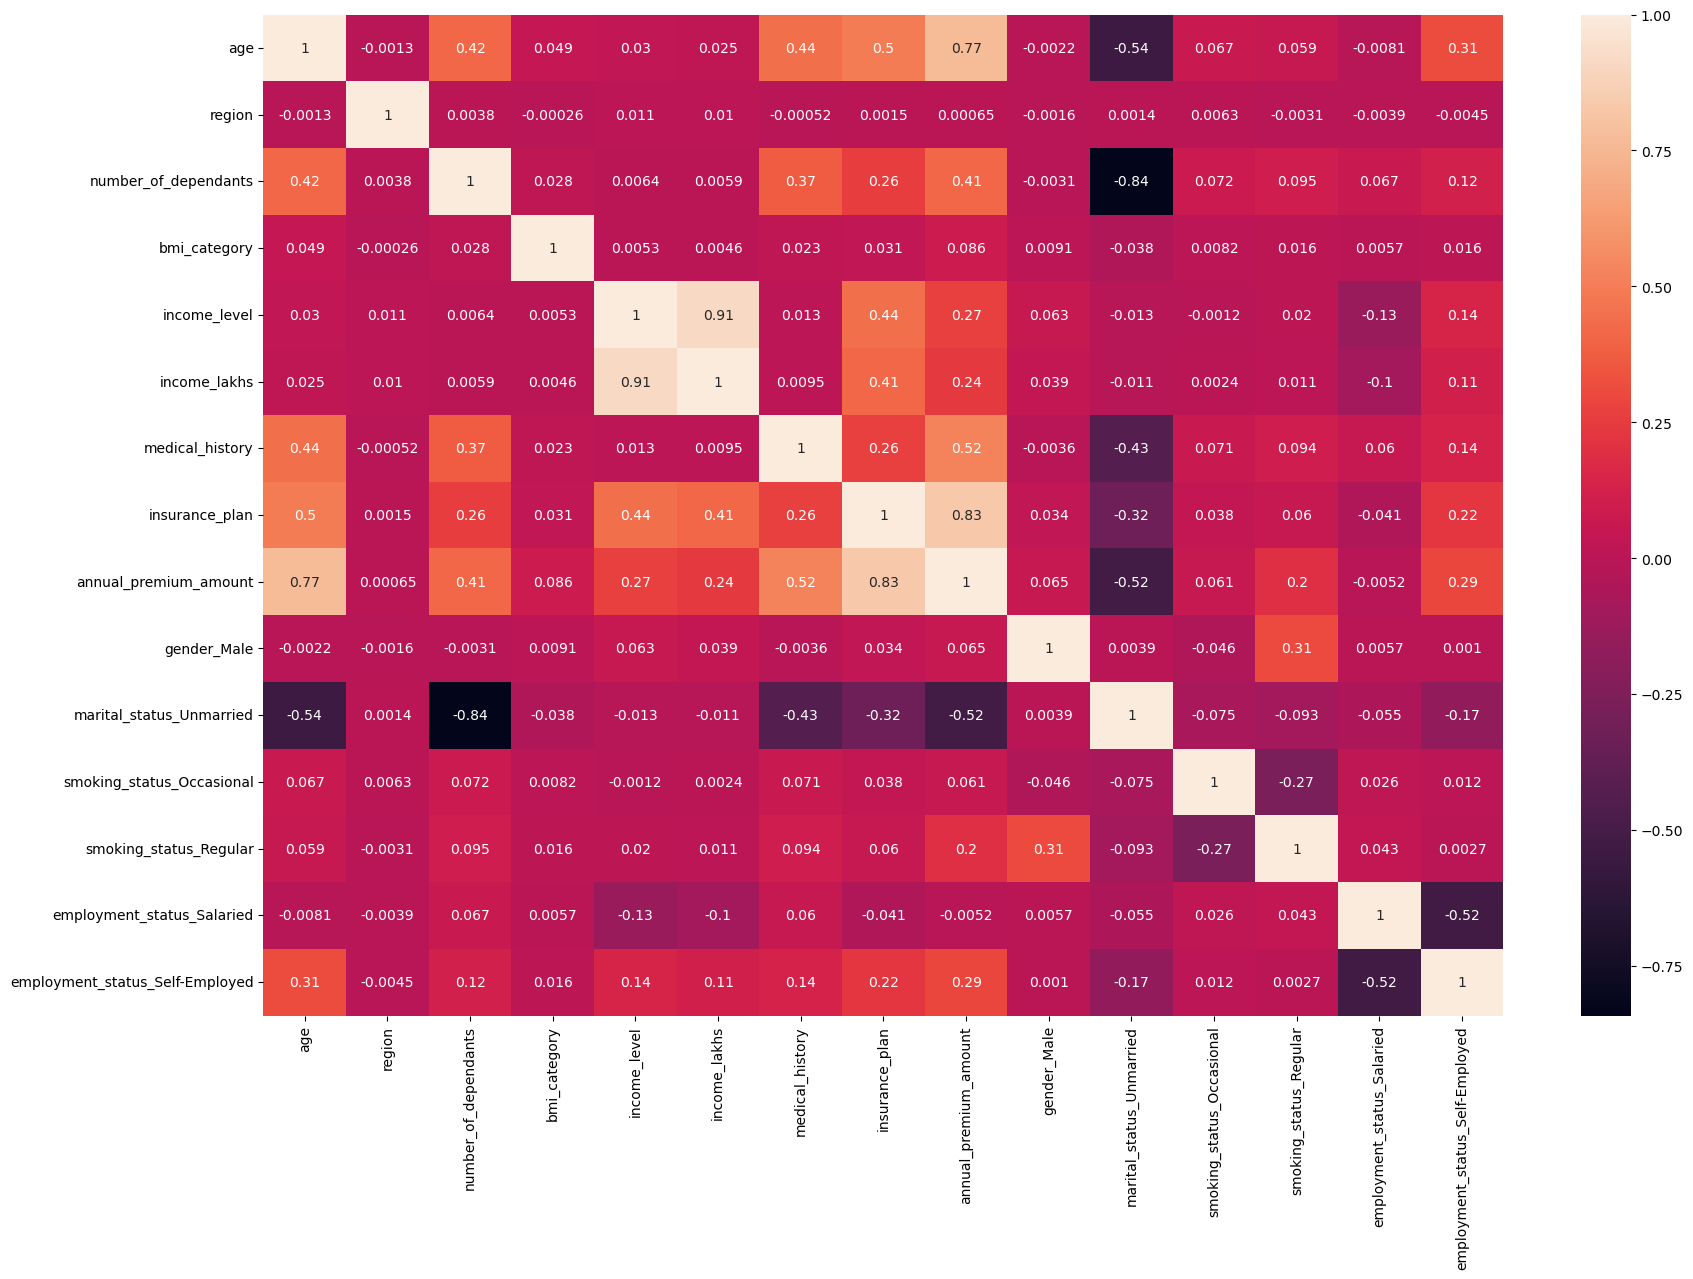

In [61]:
plt.figure(figsize = (20, 13))
sns.heatmap(cm, annot = True)

# Delete the highly correlated features : more than 80% related
 # number_of_dependents = marital_status_unmarried
# income_level = income_lakhs

# Don't delete the features which are related to target variable

In [62]:
df.drop(['marital_status_Unmarried', 'income_level'], axis = 1, inplace = True)

In [63]:
df.columns

Index(['age', 'region', 'number_of_dependants', 'bmi_category', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'gender_Male', 'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

# Step-4 : Model training & downloading/saving trained model

In [64]:
# Linear regresssion
# Xgboost

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
x = df.drop("annual_premium_amount", axis = 1)
y = df.annual_premium_amount

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [68]:
linear_obj = LinearRegression()
linear_obj.fit(x_train, y_train)

LinearRegression()

In [69]:
lr_score = linear_obj.score(x_test,y_test)
print(lr_score)

0.9109263143538293


In [70]:
# pip install --upgrade xgboost

In [71]:
import xgboost as xgb

In [72]:
XGB_obj = xgb.XGBRegressor()

In [73]:
# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators' : [20, 30, 40, 50],
    'learning_rate' : [0.001, 0.01, 0.1, 0.5],
    'max_depth' : [3,4,5,6]
}

random_search = RandomizedSearchCV(XGB_obj, param_grid, cv = 3)

random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [20, 30, 40, 50]})

In [74]:
random_search.best_score_

np.float64(0.9805715084075928)

In [ ]:
# Target1: perfomance > 97%
# Target2: difference between actual premium and predicted premium < 10%

# Target2: difference between actual premium and predicted premium < 10%

In [78]:
y_pred = random_search.predict(x_test)
y_pred

array([ 7188.797 , 24977.535 ,  6924.5454, ..., 11484.554 , 22146.426 ,
       19259.314 ], dtype=float32)

In [79]:
residuals = y_pred - y_test
residual_pct = (residuals / y_test) * 100
print(residual_pct)

18194   -29.244125
25779     0.299302
43468   -17.200222
37056    11.045427
7189     24.907312
           ...    
18266     3.796305
662     -16.077259
46152    -3.165652
2185     -2.593131
15391     5.029800
Name: annual_premium_amount, Length: 9994, dtype: float64


In [81]:
result_df = pd.DataFrame({
                            'Actual' : y_test,
                            'Predicted' : y_pred,
                            'diff' : residuals,
                            'diff_pct' : residual_pct
})

In [83]:
result_df.head(10)

,Actual,Predicted,diff,diff_pct
18194,10160,7188.796875,-2971.203125,-29.244125
25779,24903,24977.535156,74.535156,0.299302
43468,8363,6924.545410,-1438.454590,-17.200222
37056,11990,13314.346680,1324.346680,11.045427
7189,7921,9893.908203,1972.908203,24.907312
43330,22059,22140.816406,81.816406,0.370898
36576,14877,13518.026367,-1358.973633,-9.134729
9546,8780,9384.436523,604.436523,6.884243
36558,35218,33924.035156,-1293.964844,-3.674158
14258,8256,9893.908203,1637.908203,19.839004


<Axes: xlabel='diff_pct', ylabel='Count'>

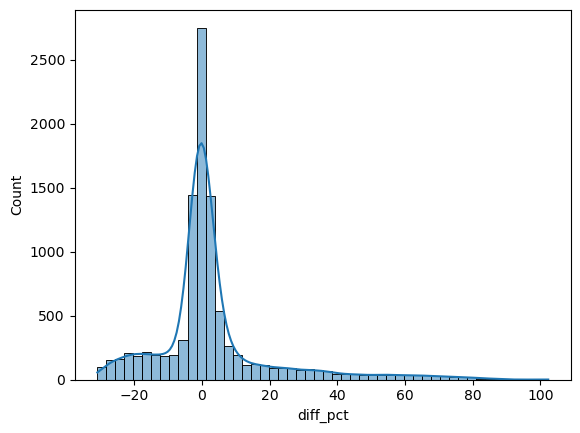

In [84]:
sns.histplot(result_df['diff_pct'], bins = 50, kde = True)

In [85]:
# extreme data 
extreame_result_df = result_df[np.abs(result_df.diff_pct > 10)]
extreame_result_df

,Actual,Predicted,diff,diff_pct
37056,11990,13314.346680,1324.346680,11.045427
7189,7921,9893.908203,1972.908203,24.907312
14258,8256,9893.908203,1637.908203,19.839004
16422,4885,7386.550781,2501.550781,51.208818
33810,5162,6936.586914,1774.586914,34.377894
...,...,...,...,...
8339,5355,6706.676270,1351.676270,25.241387
37007,5233,6698.003418,1465.003418,27.995479
46921,4613,7840.187988,3227.187988,69.958552
47434,4084,6530.644043,2446.644043,59.908032


In [86]:
extreame_result_df.shape

(1568, 4)

In [87]:
# Calculate percentage
x_test.shape

(9994, 12)

In [88]:
(1568 / 9994) * 100

15.689413648188912

In [89]:
# 3+ year experience ML engineer

# 5% values with more than 10% difference is allowed
# But we are getting 15% records having difference more than 10%

In [90]:
# Finding complete record where extreame values exist
extreame_error_df = x_test.loc[extreame_result_df.index]
extreame_error_df.head()

,age,region,number_of_dependants,bmi_category,income_lakhs,medical_history,insurance_plan,gender_Male,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
37056,0.055556,0.666667,0.6,1.000000,0.444444,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
7189,0.037037,0.666667,0.0,0.000000,0.030303,0.000000,0.5,0.0,0.0,0.0,0.0,0.0
14258,0.037037,0.666667,0.2,0.000000,0.141414,0.000000,0.5,0.0,0.0,0.0,0.0,0.0
16422,0.074074,0.666667,0.0,0.000000,0.101010,0.857143,0.0,1.0,0.0,0.0,1.0,0.0
33810,0.111111,1.000000,0.2,0.666667,0.060606,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


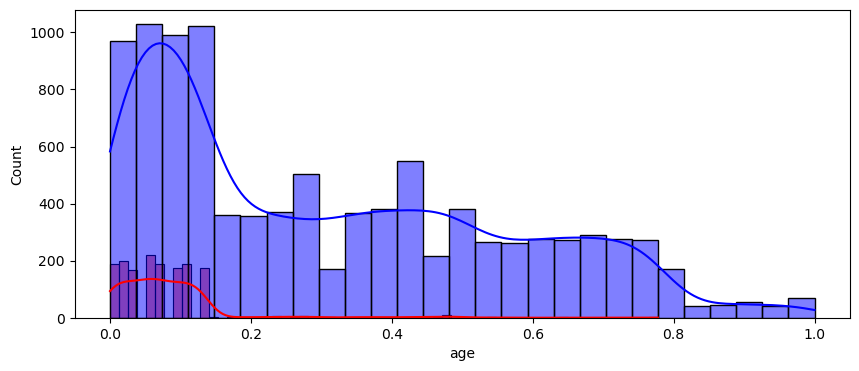

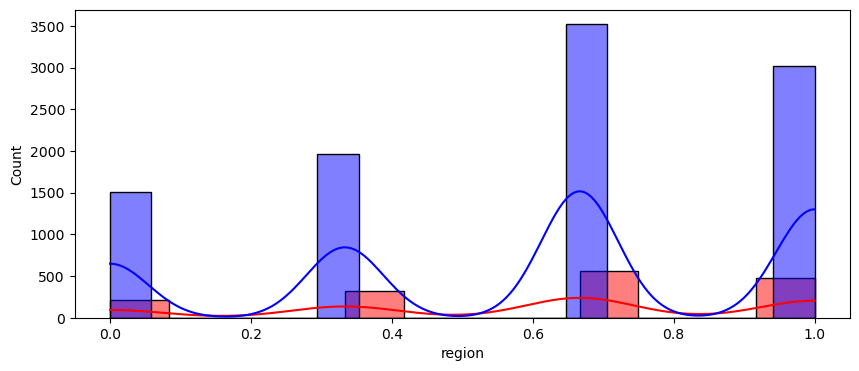

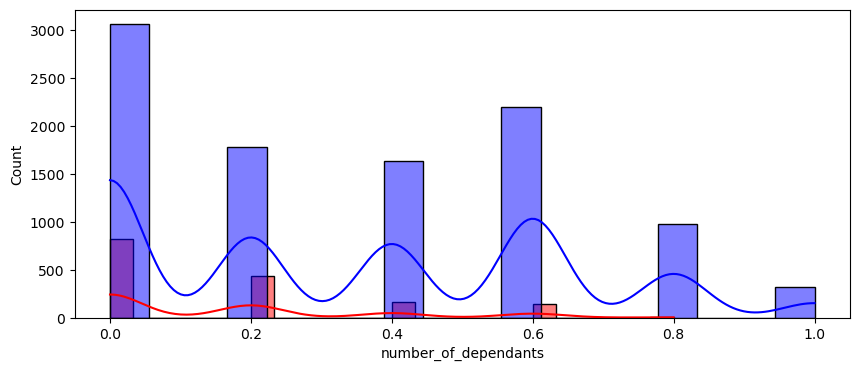

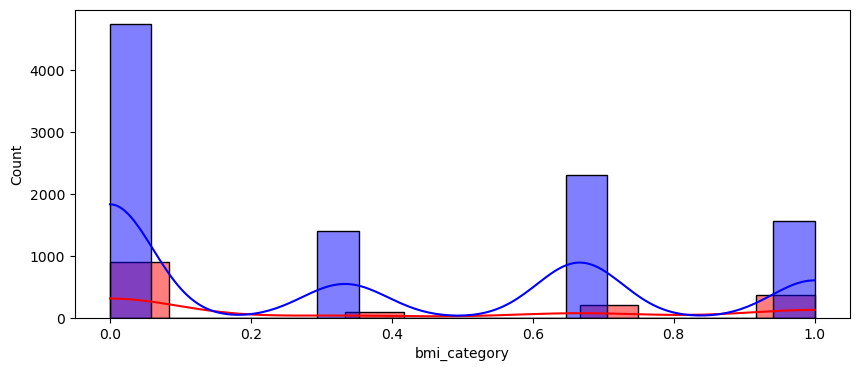

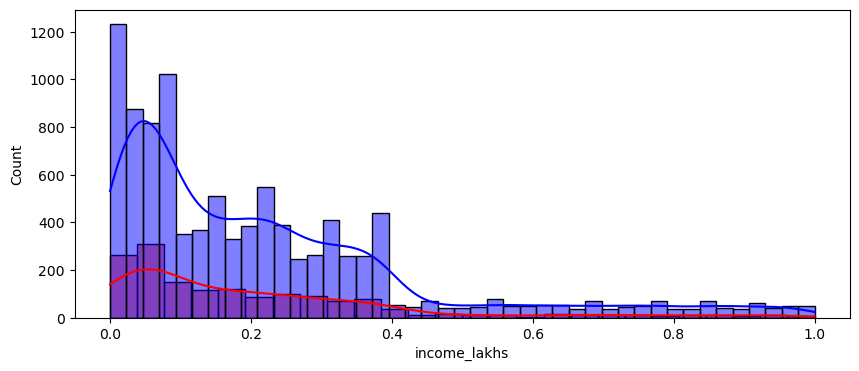

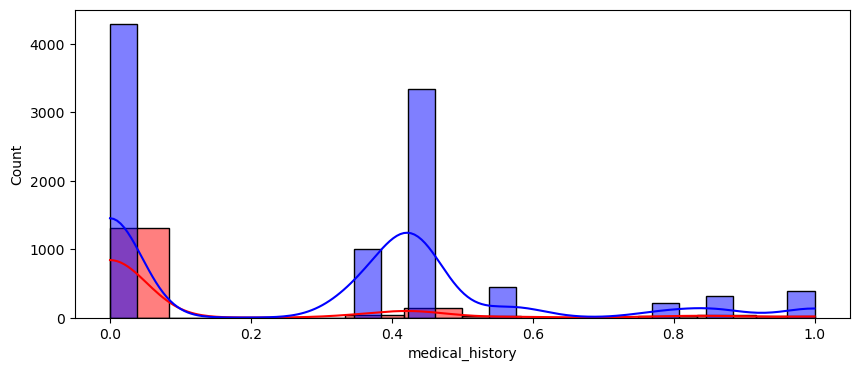

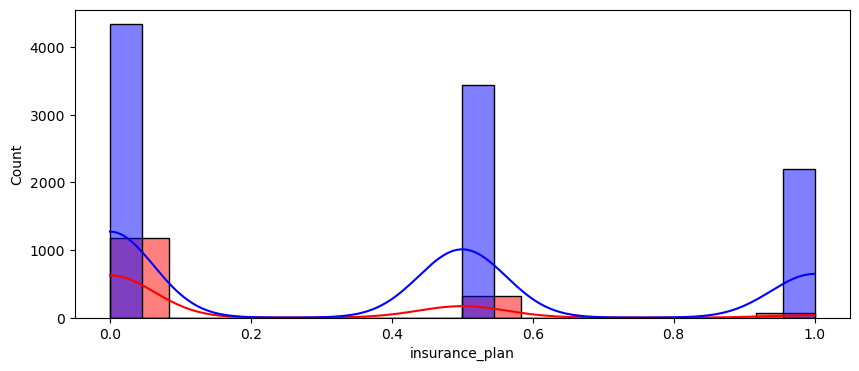

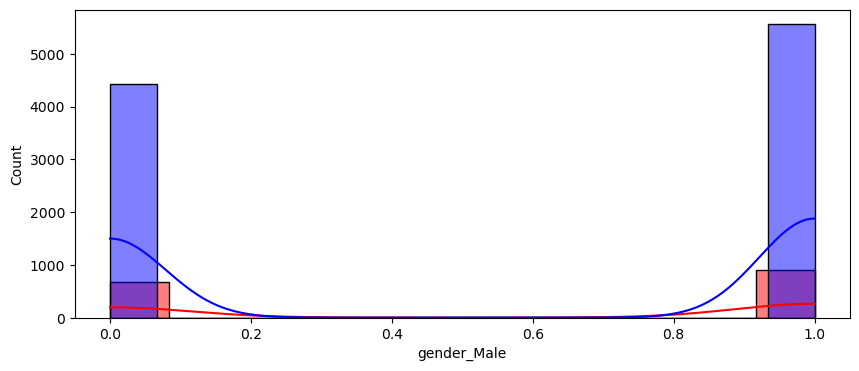

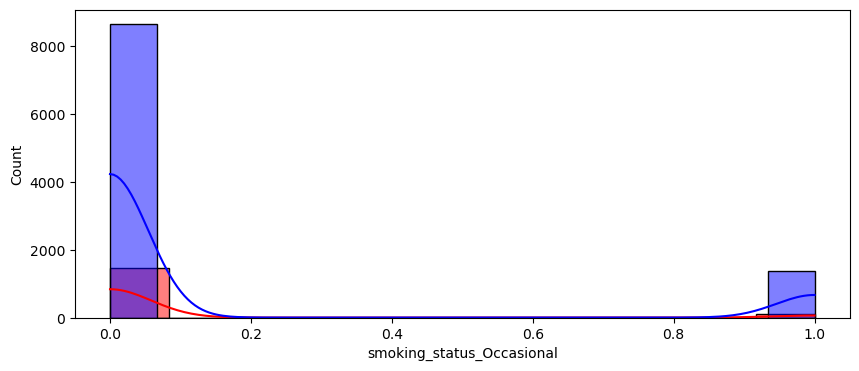

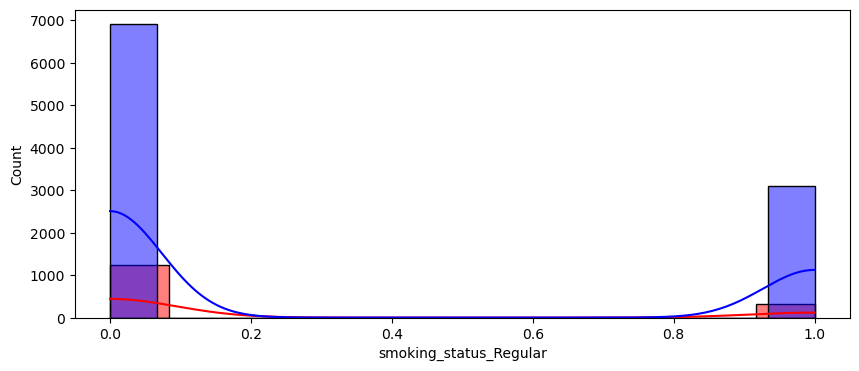

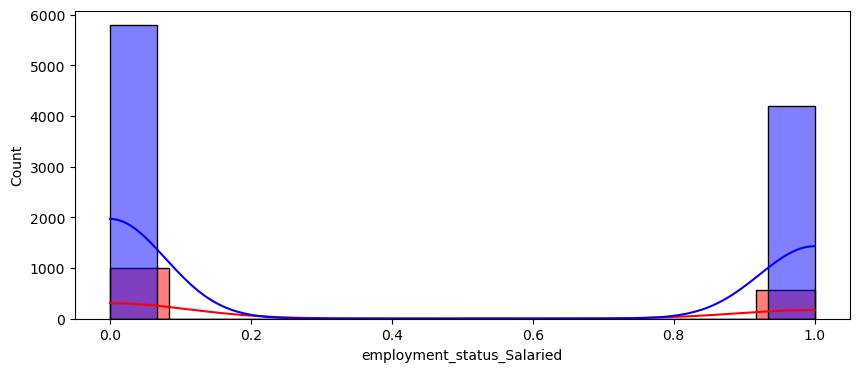

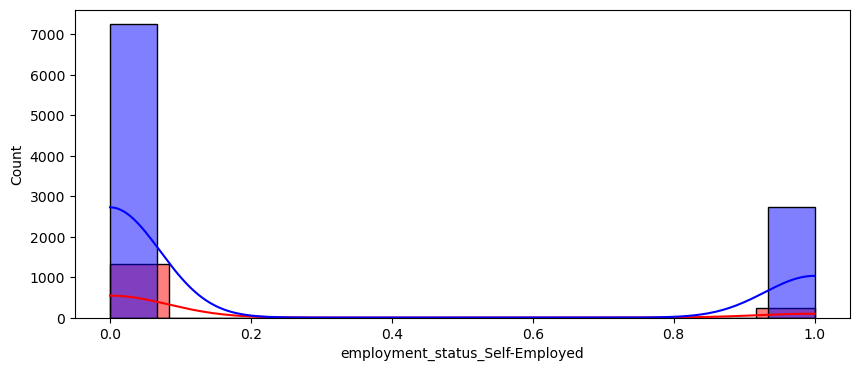

In [93]:
for feature in x_test.columns:
    plt.figure(figsize = (10,4))
    sns.histplot(extreame_error_df[feature], color = 'red', kde = True)
    sns.histplot(x_test[feature], color = 'blue', kde = True)
    plt.show()

In [94]:
x_test.shape

(9994, 12)

In [ ]:
# reverse scaling
# Segmentation